In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['font.family'] = 'times new roman'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [2]:
import glob
from astropy.table import Table

- data are in marion_dat format

- each file has 8 columns: l, f, er, ff, lz, fn, ern, ffn

    - l=observed wavelength (angstroms)
    - f=raw flux (ergs/s/cm^2/A)
    - er=error estimate by pixel
    - ff= Fourier transform smoothed spectrum
    - lz=wavelength shifted to rest frame of host (lz=l/(1+z))
    - fn, ern, & ffn are the normalized raw data (f, ff, & er)
      - normalization makes ffn=1.0 at 1.0 microns for NIR data
      - normalization makes ffn=1.7 at 7300 A for optical data

For most analysis it is easiest to look at the normalized, smoothed data (ffn) plotted against the redshift  adjusted wavelength (lz).

- IRTF data in ascii format
- Columns= lambda, de-redshift_lambda, flux, errors
- Units= microns, microns, ergs/s-1/cm-2/A-1, ergs/s-1/cm-2/A-1

([], [])

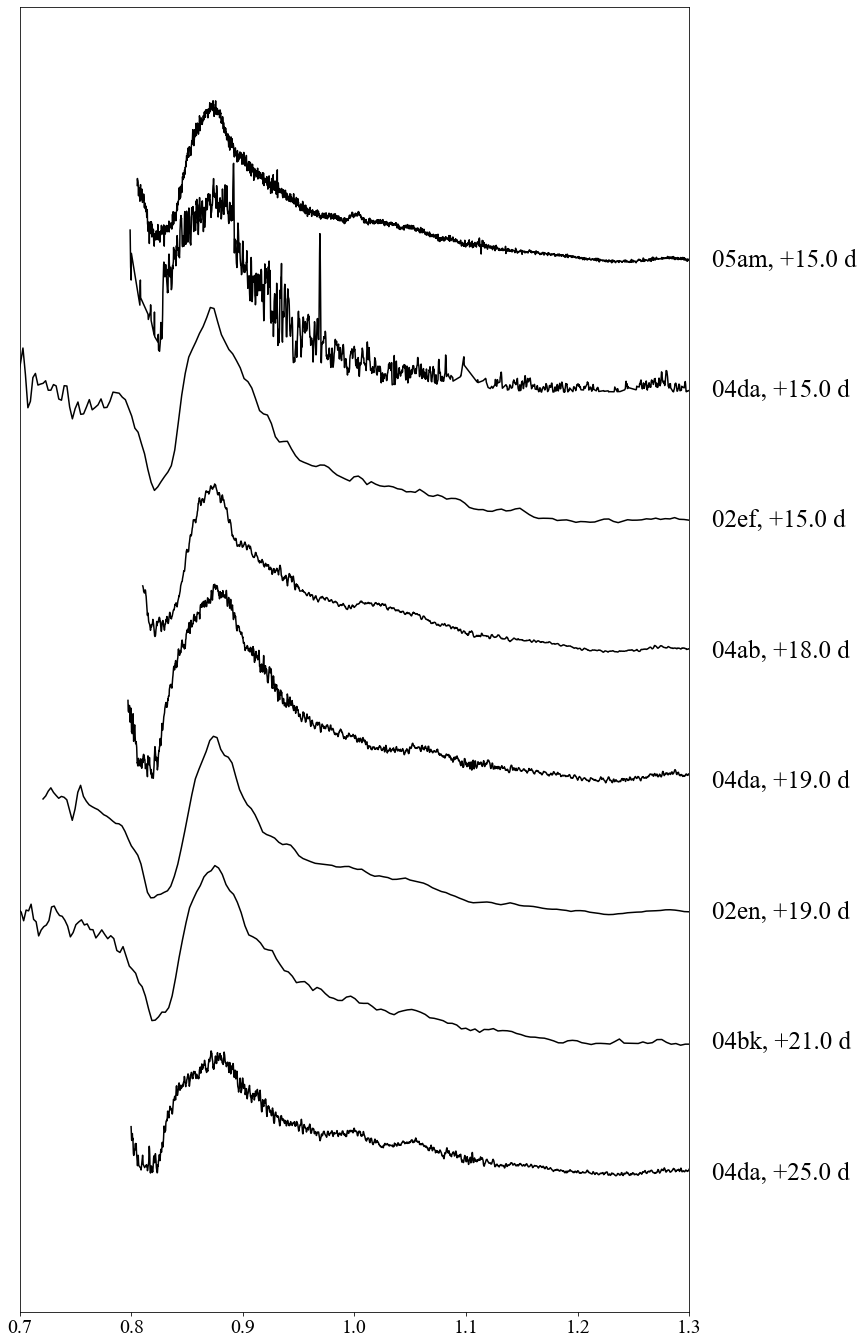

In [26]:
files = glob.glob('./*.flm')
files.sort()
Phase = []
SN = np.array([], dtype=object)
wv, flux, flux_unc = [], [], []
for f in files:
    sp = np.loadtxt(f)
    with open(f, 'r') as sp_f:
        while True:
            l = sp_f.readline()
            if 'Phase=' in l:
                Phase = np.append(Phase, float(l[l.find('=') + 2:-2]))
                break
    arg = sp[:, 2] > sp[:, 3] * 2
    wv.append(sp[arg, 1])
    flux.append(sp[arg, 2])
    flux_unc.append(sp[arg, 3])
    SN = np.append(SN, f[2:f.find('_')])
wv = np.array(wv, dtype=object)
flux = np.array(flux, dtype=object)
flux_unc = np.array(flux_unc, dtype=object)

arg_p = np.argsort(Phase)
arg_l = np.argwhere((Phase[arg_p] > 14) & (Phase[arg_p] < 30)).flatten()
plt.figure(figsize=(12, 3 * len(arg_l)))
for k in range(len(arg_l)):
    norm = flux[arg_p][arg_l[k]][np.argmin(np.abs(wv[arg_p][arg_l[k]] - 1))]
    plt.plot(wv[arg_p][arg_l[k]],
             flux[arg_p][arg_l[k]] / norm * 2 - 5 * k,
             color='k')
    if Phase[arg_p][arg_l[k]] >= 0:
        p = '+{} d'.format(Phase[arg_p][arg_l[k]])
    else:
        p = '{} d'.format(Phase[arg_p][arg_l[k]])
    plt.text(1.32, 0.1 - 5 * k, '{}, {}'.format(SN[arg_p][arg_l[k]], p))
plt.ylim(-5 * len(arg_l), 10)
plt.xlim(0.7, 1.3)
plt.yticks([])